In [2]:
import numpy as np
from glob import glob
import matplotlib
from matplotlib import pyplot as plt

import cv2

## Praktikum Bildverarbeitung
### Praktikumsversuch 2 – „Bildaufnahme, Weißabgleich und Shading-Korrektur“
Ziel des Praktikums:
Ziel dieses Versuches ist, die im ersten Versuch gewonnenen Fertigkeiten zu vertiefen und darüber hinaus, Bilder in ihre einzelnen Farbkanäle aufzuspalten und dise der Beleuchtungssituation anzupassen. Um Abbildungsfehler durch Vignettierung und ungleichmäßige Beleuchtung auszugleichen wird eine Shading-Korrektur durchgeführt.

### Bilddaten

In [3]:
imgData = glob('../../../pics/images_bv_kaschuba/bv_praktikum_02/*.*')

In [4]:
imgData

['../../../pics/images_bv_kaschuba/bv_praktikum_02/Referenzbild.bmp',
 '../../../pics/images_bv_kaschuba/bv_praktikum_02/20_Euro.bmp']

### Aufgabe 1
Nutzen Sie die Funktionen **cv2.imread(filename)** zum laden der Bilddatein **'20_Euro.bmp'** und **'Referenzbild.bmp'**.

In [10]:
image = cv2.imread(imgData[1])
image_referenz = cv2.imread(imgData[0])

# width, height, channel, type
width, height, c = image.shape
print('(width , height, c) =', image.shape)
print('dtype: ', image.dtype)

(width , height, c) = (1200, 1600, 3)
dtype:  uint8


Bilddatei **20_Euro.bmp** mit der Funktion **plt.imshow(image)** darstellen.

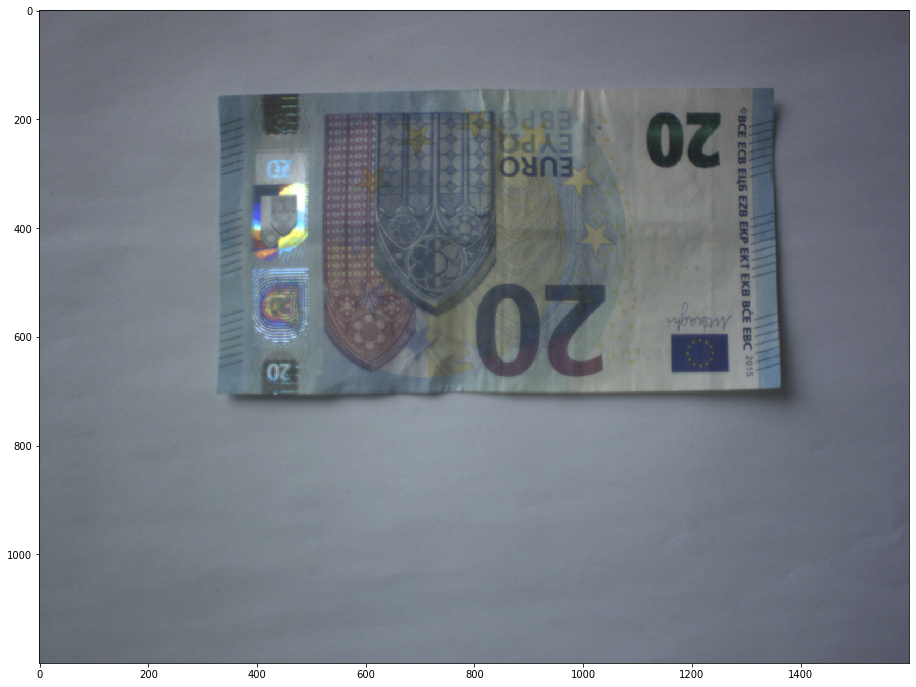

In [30]:
# COLOR_BGR2RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# imshow
plt.figure(figsize=(16, 12))
plt.imshow(image_rgb)

Bilddatei **Referenzbild.bmp** mit der Funktion **plt.imshow(image)** darstellen.

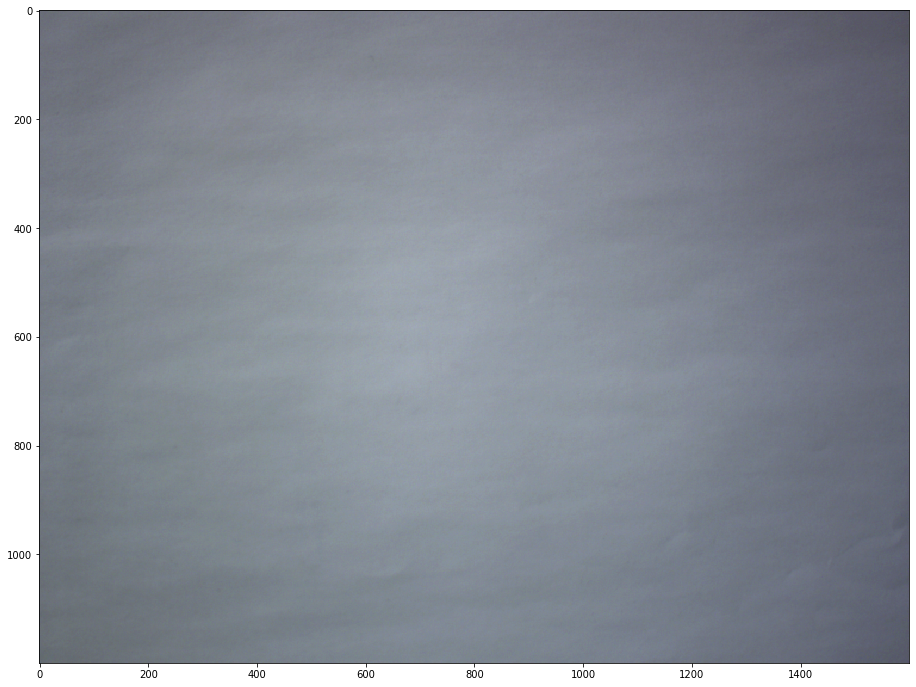

In [29]:
# BGR2RGB
image_referenz_rgb = cv2.cvtColor(image_referenz, cv2.COLOR_BGR2RGB)

# imshow
plt.figure(figsize=(16, 12))
plt.imshow(image_referenz_rgb)

### Aufgabe 2
Teilen sie das Bild in seine Falbkanäle auf. Korrigieren Sie die einzelnen Kanäle um ein möglichst „reines“ Weiß zu erhalten.

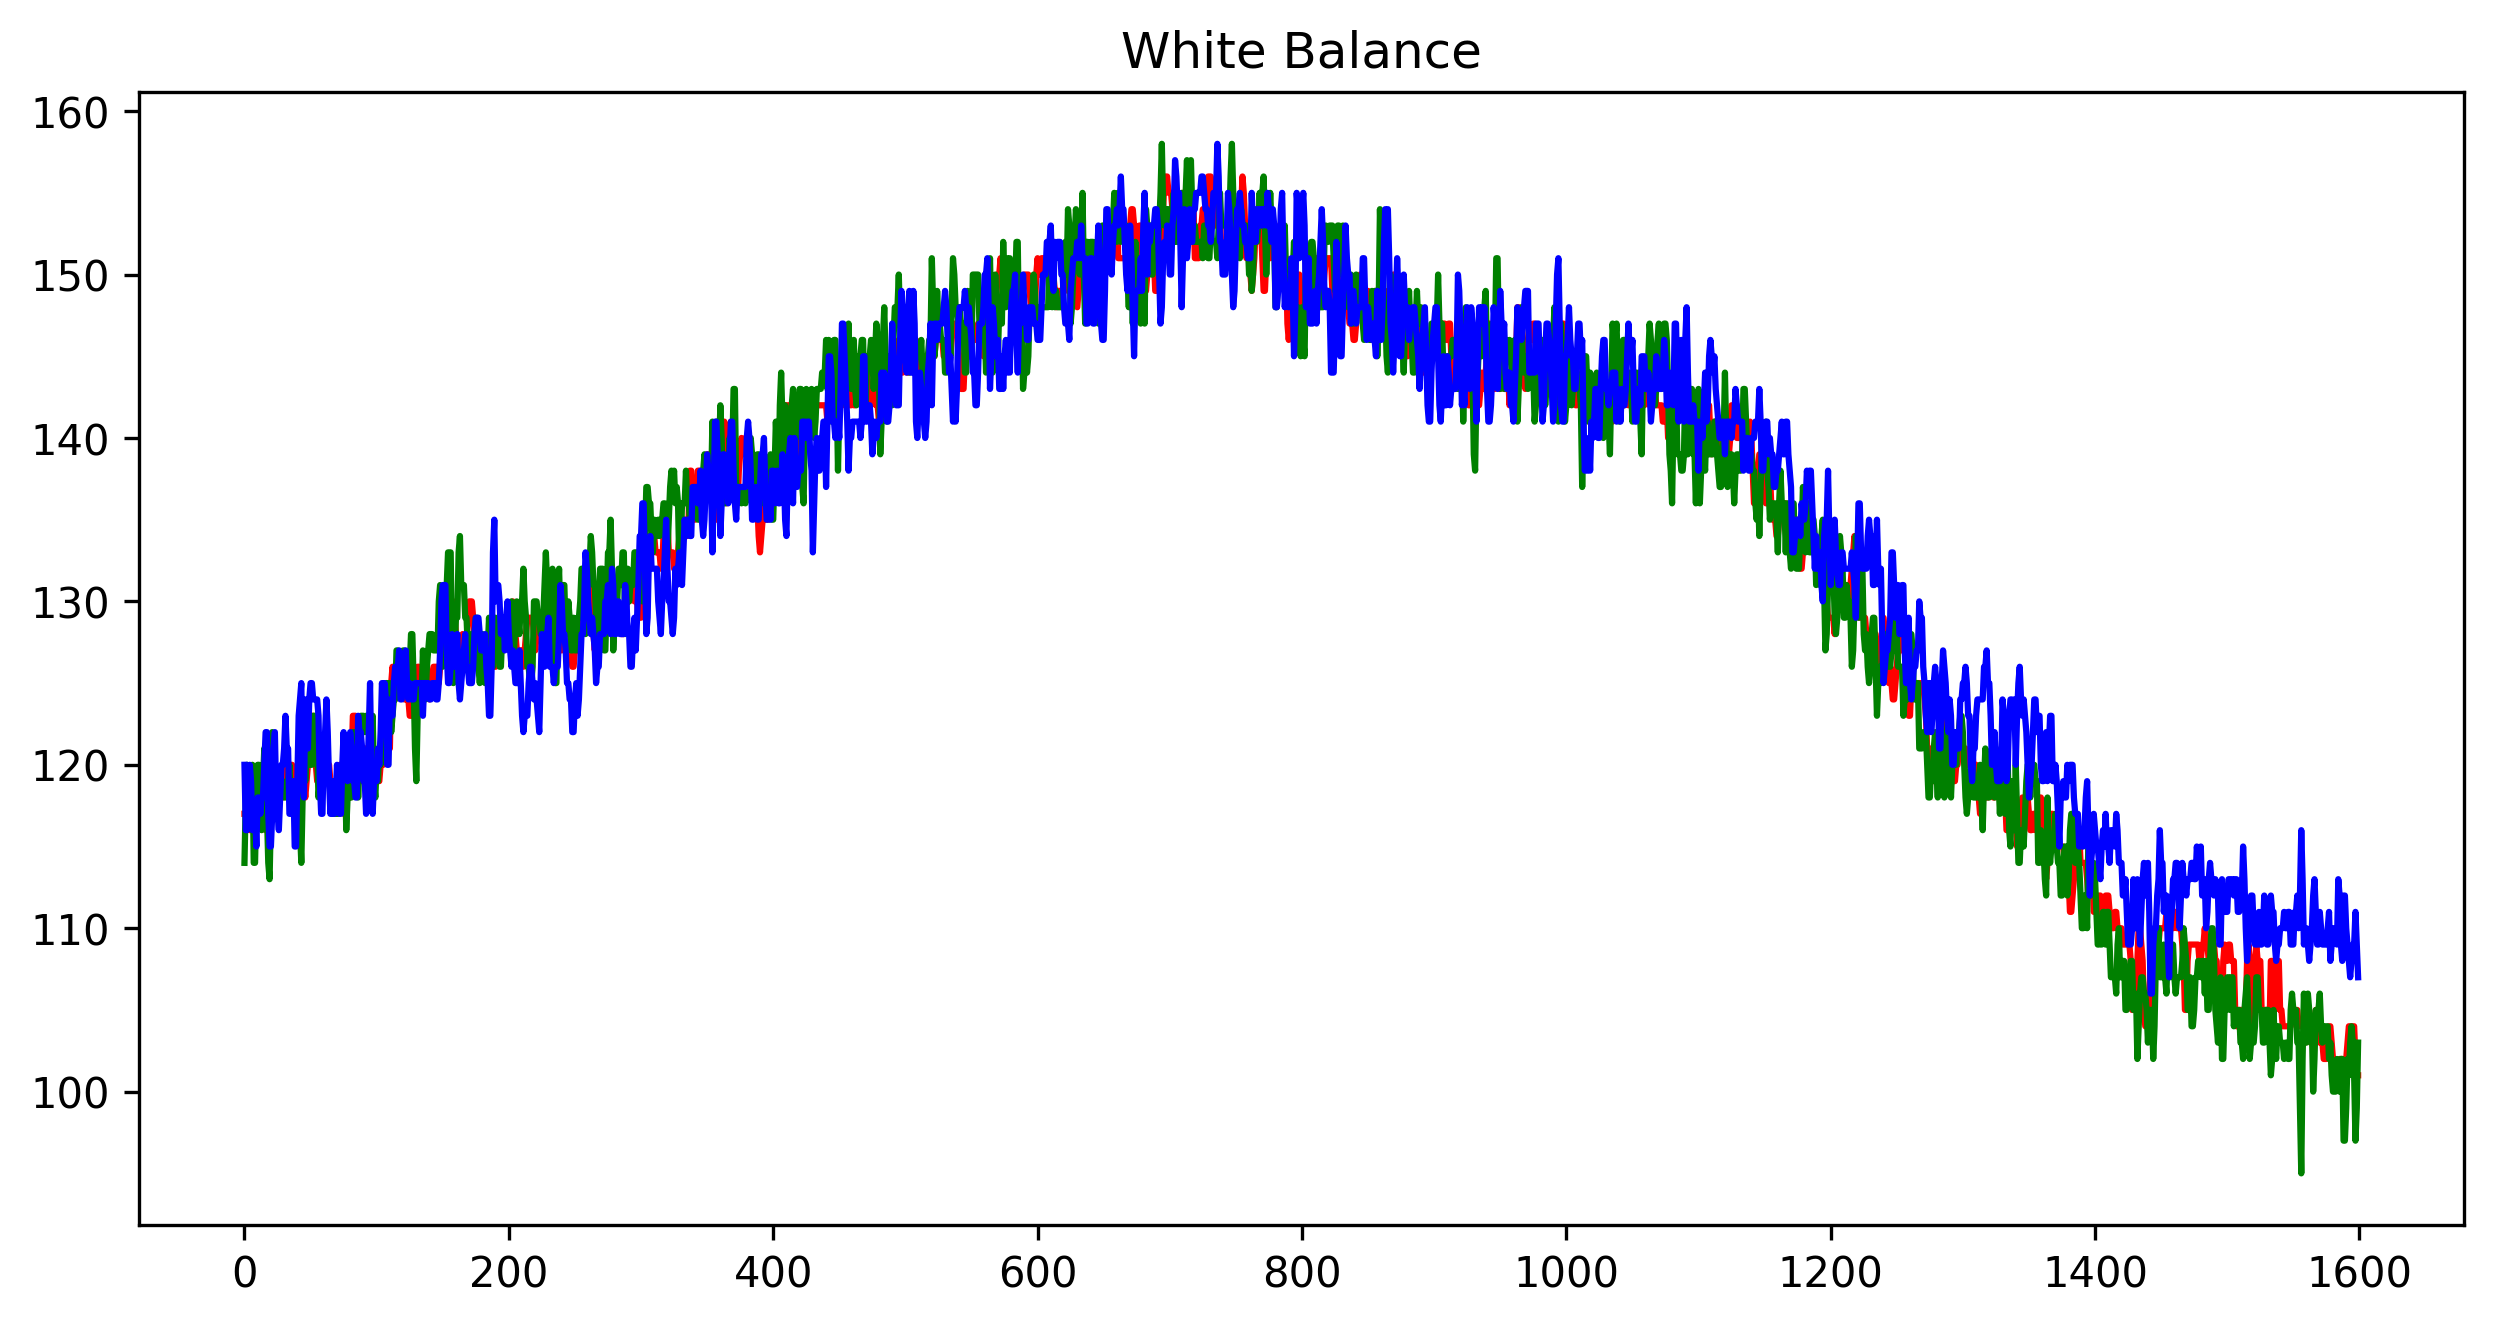

In [45]:
# split image
(B, G, R) = cv2.split(image)

#  White Balance
B = (B*0.94).astype('uint8')
G = (G*1.0).astype('uint8')
R = (R*1.07).astype('uint8')

#B = cv2.multiply(B, 1, scale=0.94)
#G = cv2.multiply(G, 1, scale=1.0)
#R = cv2.multiply(R, 1, scale=1.07)

# probe
line = 800
red_values = R[line,:]
green_values = G[line,:]
blue_values = B[line,:]

# plot
plt.figure(figsize=(10, 5), dpi=300)
plt.title("White Balance")
plt.plot(red_values, color="red")
plt.plot(green_values, color="green")
plt.plot(blue_values, color="blue")
plt.show()

Bilddatei **20_Euro.bmp** mit der Funktion **plt.imshow(image)** darstellen.

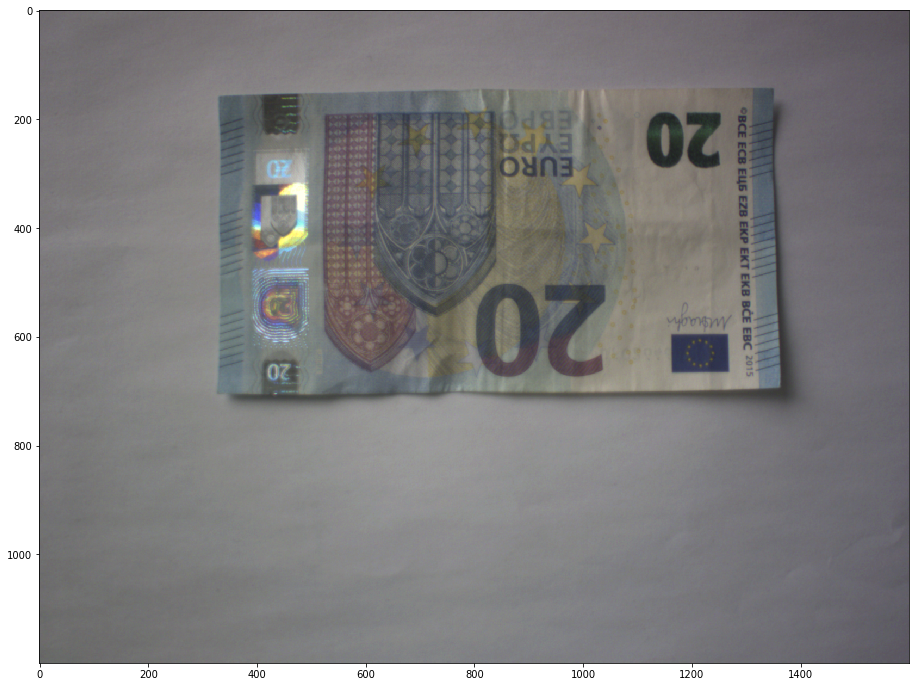

In [39]:
# merge 
image_wb = cv2.merge((B,G,R))

# COLOR_BGR2RGB
image_wb_rgb = cv2.cvtColor(image_wb, cv2.COLOR_BGR2RGB)

# imshow
plt.figure(figsize=(16, 12))
plt.imshow(image_wb_rgb)

### Aufgabe 3
Führen Sie eine Shading-Korrektur durch und speichern Sie das korrigierte Bild ab.

Bedenken Sie, dass der Weißabgleich entweder bei der Originalaufnahme und dem Referenzbild oder im Anschluss an die Shading-Korrektur vorgenommen werden muss. Ob Sie beide Möglichkeiten der Shading-Korrektur ausprobieren, bleibt Ihnen überlassen. Sie sollten jedoch erklären können, welche Methode hier besser geeignet ist.

In [62]:
image_shading = np.zeros(image.shape)

for i in range(width):
    for j in range(height):
        for k in range(c):
            image_shading[i,j,k] = float(image[i,j,k])/float(image_referenz[i,j,k])
            if image_shading[i,j,k] > 1:
                image_shading[i,j,k] = 1.0
            
image_shading = (image_shading*230).astype(np.uint8)
print('(width , height, c) =', image_shading.shape)

(width , height, c) = (1200, 1600, 3)


Bilddatei mit der Shading-Korrektur mit der Funktion **plt.imshow(image_shading)** darstellen.

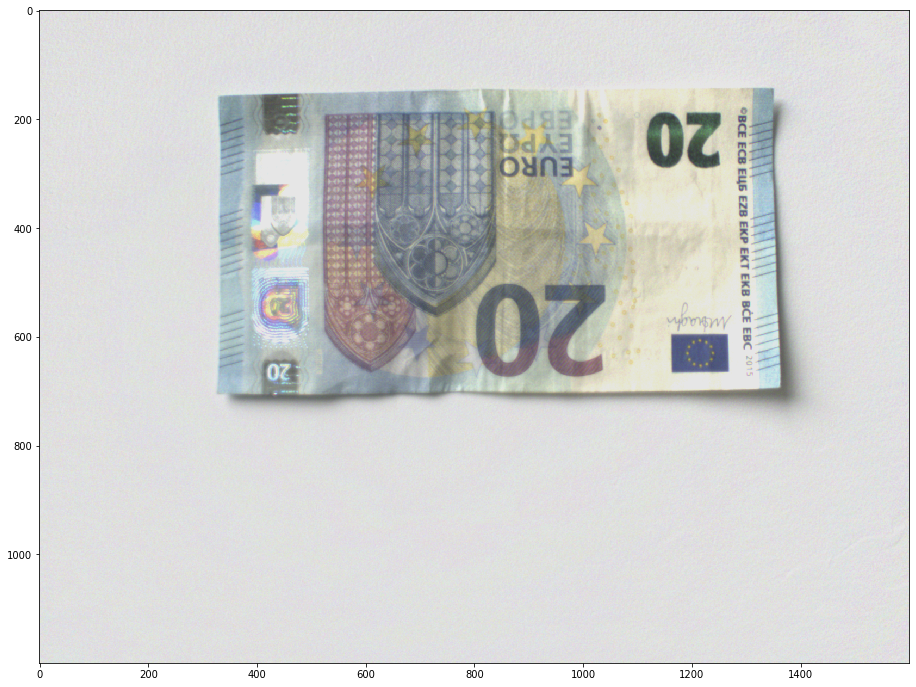

In [63]:
# COLOR_BGR2RGB
image_shading_rgb = cv2.cvtColor(image_shading, cv2.COLOR_BGR2RGB)

# imshow
plt.figure(figsize=(16, 12))
plt.imshow(image_shading_rgb)